### Para comenzar el analisis importamos ciertos elementos que vamos a utilizar en primera instancia. Luego se importaran los que sean necesarios para continuar el analisis.

In [2]:
import pandas as pd
df = pd.read_csv("BaseMiPyme.csv")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df.head() # Para ver como se compone la base de datos.

,Unnamed: 0,ID,Regimen_Tributario,Emision_certificado,Vencimiento_certificado,Categoria,Sector,Provincia,ID_provincia,CLAE6,Vigente
0,1,2653861,Autonomos,2016-06-17,2017-05-31,micro,Industria,BUENOS AIRES,6,222090,0
1,2,1207103,Autonomos,2016-06-17,2017-05-31,micro,Servicios,MENDOZA,50,960990,0
2,3,1782167,Autonomos,2016-06-17,2017-05-31,micro,Servicios,SANTA FE,82,492290,0
3,4,2213893,Autonomos,2016-06-20,2017-05-31,micro,Servicios,SANTIAGO DEL ESTERO,86,107129,0
4,5,2467540,Autonomos,2016-06-20,2017-05-31,micro,Industria,BUENOS AIRES,6,466931,0


In [4]:
df.drop(['CLAE6', 'ID_provincia', 'Unnamed: 0', 'ID'], axis = 'columns', inplace=True) 
# Eliminamos columnas que no vamos a utilizar en el analisis

In [5]:
df.head() # Volvemos a mostrar como se compone la base de datos con las columnas limpias de valores que no se utilizaran.

,Regimen_Tributario,Emision_certificado,Vencimiento_certificado,Categoria,Sector,Provincia,Vigente
0,Autonomos,2016-06-17,2017-05-31,micro,Industria,BUENOS AIRES,0
1,Autonomos,2016-06-17,2017-05-31,micro,Servicios,MENDOZA,0
2,Autonomos,2016-06-17,2017-05-31,micro,Servicios,SANTA FE,0
3,Autonomos,2016-06-20,2017-05-31,micro,Servicios,SANTIAGO DEL ESTERO,0
4,Autonomos,2016-06-20,2017-05-31,micro,Industria,BUENOS AIRES,0


### A) DATA WRANGLING

#### En el caso de esta base de datos, esta muy limpia y no hay valores nulos, por lo que la limpieza de datos es muy corta con respecto a otras bases. Se deja el codigo que prueba que no hay datos nulos y una comprobación adicional a modo de ejemplo.

In [6]:
# Hacemos este chequeo para ver si hay algun valor NAN en el dataframe, si sale TRUE quiere decir que si hay al menos un valor
# NAN y deberemos verificar como resolverlo tambien.
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [7]:
df.isnull().sum() # Otra forma de corroborar que no faltan datos, nos muestra la suma de valores que faltan.

Regimen_Tributario         0
Emision_certificado        0
Vencimiento_certificado    0
Categoria                  0
Sector                     0
Provincia                  0
Vigente                    0
dtype: int64

### B) VISUALIZANDO LAS VARIABLES

In [8]:
df.Regimen_Tributario.value_counts()


Monotributo    978908
Autonomos      607693
Sociedades     344777
Name: Regimen_Tributario, dtype: int64

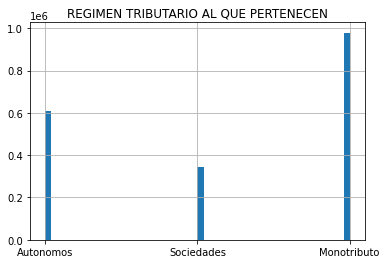

<Figure size 432x288 with 0 Axes>

In [9]:
df['Regimen_Tributario'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('REGIMEN TRIBUTARIO AL QUE PERTENECEN')
plt.grid(True)
plt.show()
plt.clf()

In [10]:
df.Categoria.value_counts()

micro     1846217
peq         70209
tramo1      14136
tramo2        816
Name: Categoria, dtype: int64

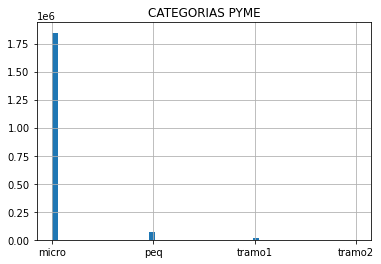

<Figure size 432x288 with 0 Axes>

In [11]:
df['Categoria'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('CATEGORIAS PYME')
plt.grid(True)
plt.show()
plt.clf()

In [12]:
df.Sector.value_counts()

Servicios       945734
Comercio        474979
Industria       255688
Agropecuario    166436
Construccion     86610
Mineria           1931
Name: Sector, dtype: int64

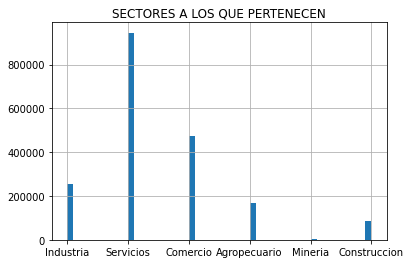

<Figure size 432x288 with 0 Axes>

In [13]:
df['Sector'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('SECTORES A LOS QUE PERTENECEN')
plt.grid(True)
plt.show()
plt.clf()

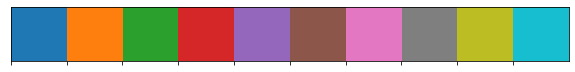

In [14]:
#Definimos la paleta de colores que usaremos en los graficos siguientes
sns.palplot(sns.color_palette("tab10"))

Text(0.5, 1.0, 'DISTRIBUCION DE PYMES SEGUN SU SECTOR COMERCIAL')

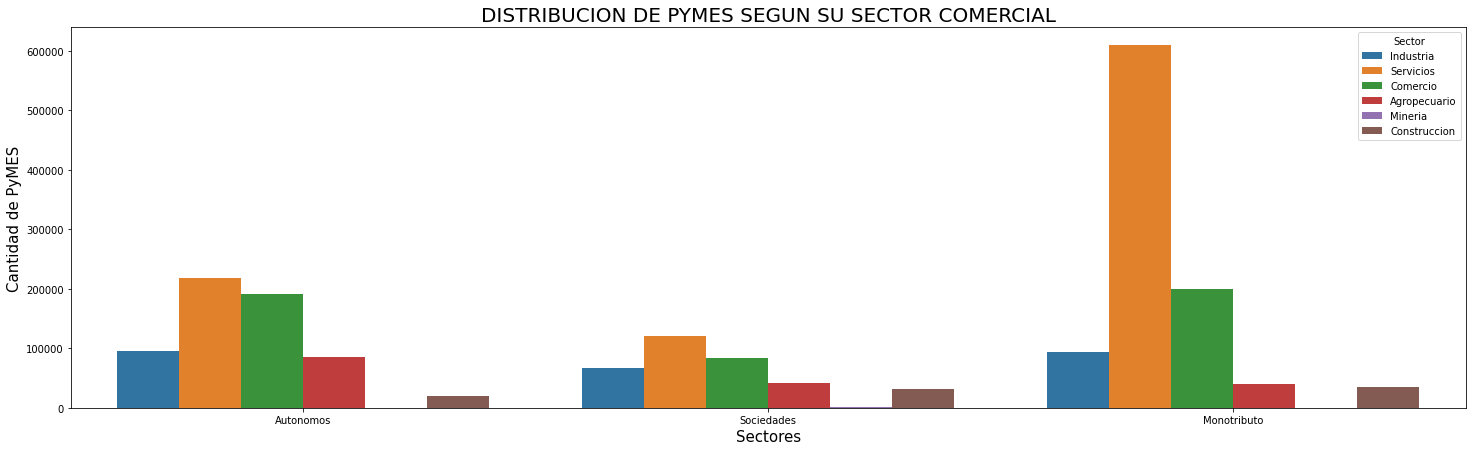

In [15]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 25,7 #Tamaño del grafico
ax=sns.countplot(x="Regimen_Tributario", hue="Sector", data=df, palette="tab10") #Graficar y definir el color
ax.set_xlabel("Sectores", fontsize = 15) #Texto en el eje X
ax.set_ylabel("Cantidad de PyMES", fontsize = 15) #Texto en el eje Y
ax.set_title("DISTRIBUCION DE PYMES SEGUN SU SECTOR COMERCIAL", fontsize = 20) #Texto del titulo

Text(0.5, 1.0, 'DISTRIBUCION DE PYMES SEGUN PROVINCIAS')

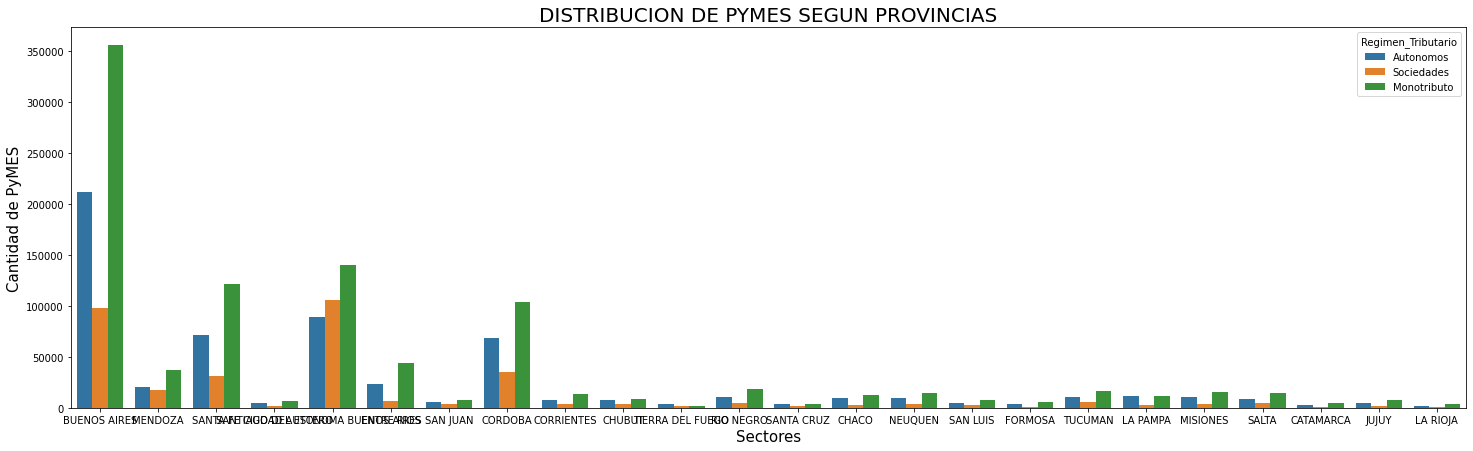

In [16]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 25,7 #Tamaño del grafico
ax=sns.countplot(x="Provincia", hue="Regimen_Tributario", data=df, palette="tab10") #Graficar y definir el color
ax.set_xlabel("Sectores", fontsize = 15) #Texto en el eje X
ax.set_ylabel("Cantidad de PyMES", fontsize = 15) #Texto en el eje Y
ax.set_title("DISTRIBUCION DE PYMES SEGUN PROVINCIAS", fontsize = 20) #Texto del titulo